In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Application/turbulence_dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1000, 8)

First few rows:


,Altitude,Wind_Speed,Pressure,Temp_Gradient,Wind_Shear,Vertical_Acceleration,Jet_Stream_Speed,Turbulence
0,35270,117,315,5.90,1.57,0.024,173,1
1,28860,59,280,2.27,7.04,0.018,112,0
2,33390,116,306,2.50,4.16,0.104,178,1
3,33191,154,339,9.25,4.37,0.177,132,1
4,39964,158,318,3.11,4.88,0.056,162,1


## Dataset Overview

In [2]:
print("Dataset Statistics:")
print(f"Total Samples: {len(df)}")
print(f"Number of Features: {df.shape[1] - 1}")
print(f"\nTurbulence Distribution:")
print(df['Turbulence'].value_counts())
print(f"\nPercentages:")
print(df['Turbulence'].value_counts(normalize=True) * 100)

Dataset Statistics:
Total Samples: 1000
Number of Features: 7

Turbulence Distribution:
Turbulence
1    853
0    147
Name: count, dtype: int64

Percentages:
Turbulence
1    85.3
0    14.7
Name: proportion, dtype: float64


##  Distribution - Pie Chart

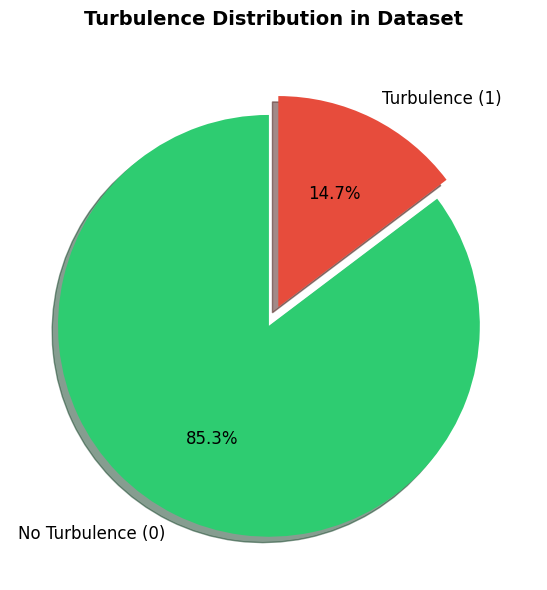

In [8]:
# Pie chart of Turbulence distribution
fig, ax = plt.subplots(figsize=(8, 6))
turbulence_counts = df['Turbulence'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for 0, Red for 1
explode = (0.05, 0.05)

ax.pie(turbulence_counts, labels=['No Turbulence (0)', 'Turbulence (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12},
        explode=explode, shadow=True)
ax.set_title('Turbulence Distribution in Dataset', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Feature Relationships

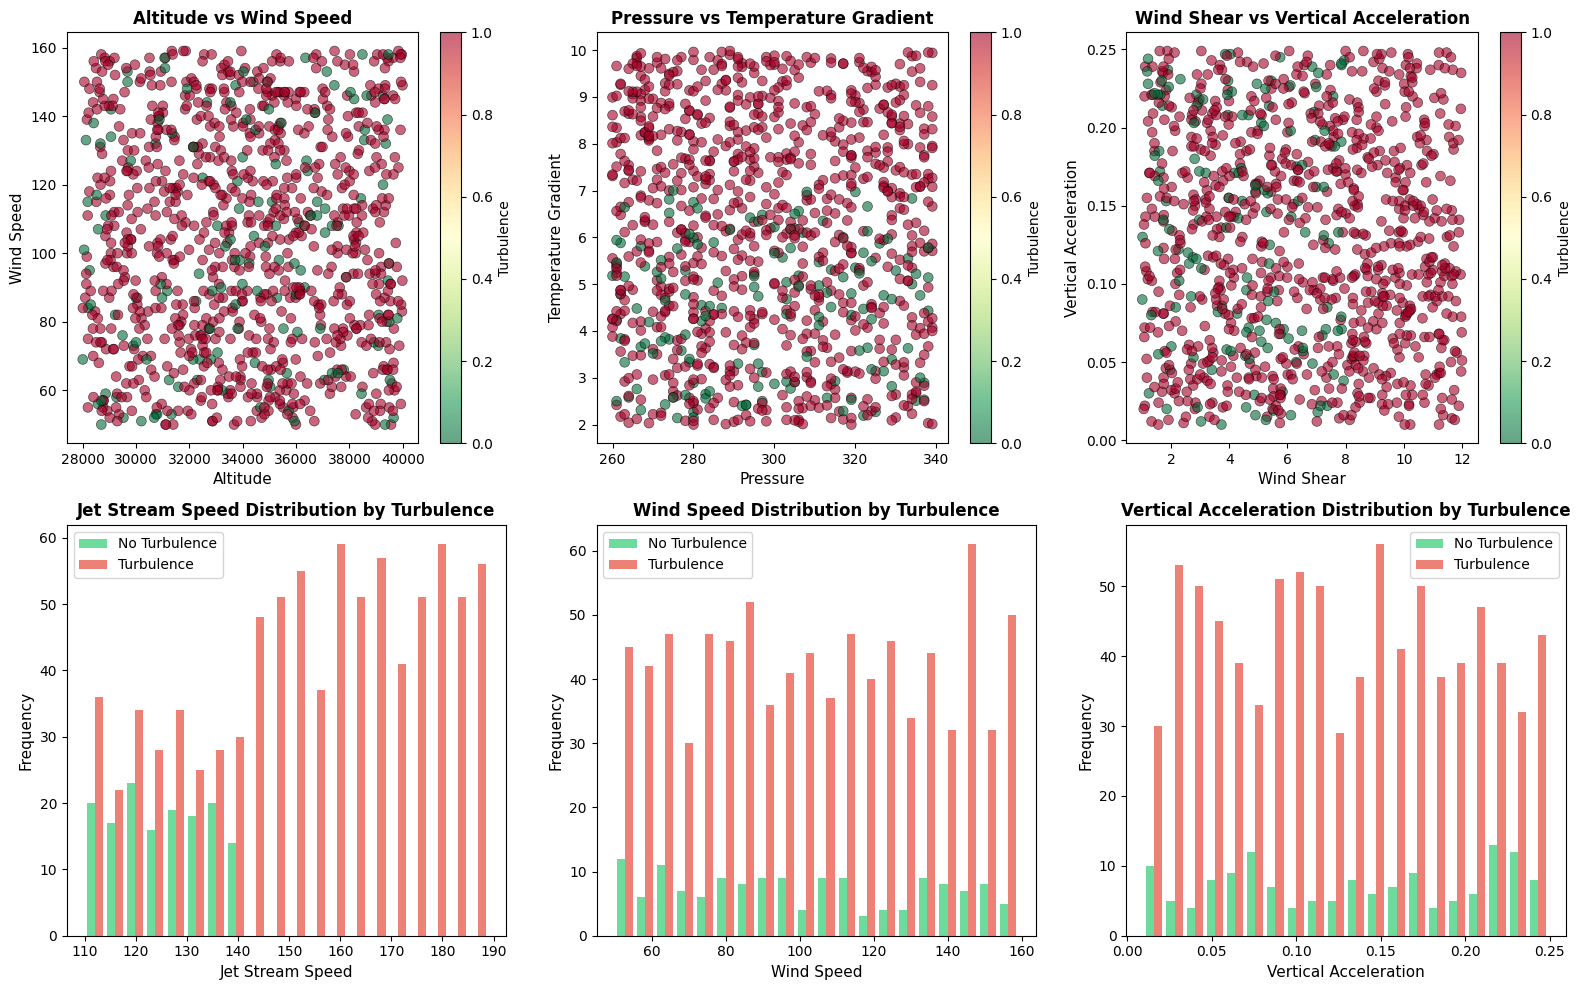

In [ ]:
# Create a figure with subplots
fig = plt.figure(figsize=(16, 10))

# 1. Altitude vs Wind_Speed
ax1 = plt.subplot(2, 3, 1)
scatter1 = ax1.scatter(df['Altitude'], df['Wind_Speed'], c=df['Turbulence'], 
                      cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Altitude', fontsize=11)
ax1.set_ylabel('Wind Speed', fontsize=11)
ax1.set_title('Altitude vs Wind Speed', fontsize=12, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Turbulence')

# 2. Pressure vs Temp_Gradient
ax2 = plt.subplot(2, 3, 2)
scatter2 = ax2.scatter(df['Pressure'], df['Temp_Gradient'], c=df['Turbulence'], 
                       cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Pressure', fontsize=11)
ax2.set_ylabel('Temperature Gradient', fontsize=11)
ax2.set_title('Pressure vs Temperature Gradient', fontsize=12, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Turbulence')

# 3. Wind_Shear vs Vertical_Acceleration
ax3 = plt.subplot(2, 3, 3)
scatter3 = ax3.scatter(df['Wind_Shear'], df['Vertical_Acceleration'], c=df['Turbulence'], 
                       cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Wind Shear', fontsize=11)
ax3.set_ylabel('Vertical Acceleration', fontsize=11)
ax3.set_title('Wind Shear vs Vertical Acceleration', fontsize=12, fontweight='bold')
plt.colorbar(scatter3, ax=ax3, label='Turbulence')

# 4. Jet_Stream_Speed distribution
ax4 = plt.subplot(2, 3, 4)
ax4.hist([df[df['Turbulence']==0]['Jet_Stream_Speed'], 
          df[df['Turbulence']==1]['Jet_Stream_Speed']], 
         label=['No Turbulence', 'Turbulence'], color=['#2ecc71', '#e74c3c'], alpha=0.7, bins=20)
ax4.set_xlabel('Jet Stream Speed', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Jet Stream Speed Distribution by Turbulence', fontsize=12, fontweight='bold')
ax4.legend()

# 5. Wind Speed distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist([df[df['Turbulence']==0]['Wind_Speed'], 
          df[df['Turbulence']==1]['Wind_Speed']], 
         label=['No Turbulence', 'Turbulence'], color=['#2ecc71', '#e74c3c'], alpha=0.7, bins=20)
ax5.set_xlabel('Wind Speed', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Wind Speed Distribution by Turbulence', fontsize=12, fontweight='bold')
ax5.legend()

# 6. Vertical Acceleration distribution
ax6 = plt.subplot(2, 3, 6)
ax6.hist([df[df['Turbulence']==0]['Vertical_Acceleration'], 
          df[df['Turbulence']==1]['Vertical_Acceleration']], 
         label=['No Turbulence', 'Turbulence'], color=['#2ecc71', '#e74c3c'], alpha=0.7, bins=20)
ax6.set_xlabel('Vertical Acceleration', fontsize=11)
ax6.set_ylabel('Frequency', fontsize=11)
ax6.set_title('Vertical Acceleration Distribution by Turbulence', fontsize=12, fontweight='bold')
ax6.legend()

plt.tight_layout()
plt.show()

## Statistical Summary by Turbulence Class

In [5]:
# Statistics for non-turbulent cases
print("Statistics for Non-Turbulent Cases (Turbulence = 0):")
print(df[df['Turbulence'] == 0].describe())
print("\n" + "="*80 + "\n")
print("Statistics for Turbulent Cases (Turbulence = 1):")
print(df[df['Turbulence'] == 1].describe())

Statistics for Non-Turbulent Cases (Turbulence = 0):
           Altitude  Wind_Speed    Pressure  Temp_Gradient  Wind_Shear  \
count    147.000000  147.000000  147.000000     147.000000  147.000000   
mean   33962.306122  100.523810  297.537415       4.481973    4.536122   
std     3466.484500   32.314663   23.337392       1.400539    2.061000   
min    28004.000000   50.000000  260.000000       2.140000    1.010000   
25%    31023.500000   73.000000  278.000000       3.240000    2.800000   
50%    34031.000000   97.000000  297.000000       4.650000    4.610000   
75%    36744.500000  131.500000  319.000000       5.615000    6.215000   
max    39794.000000  158.000000  338.000000       7.000000    7.950000   

       Vertical_Acceleration  Jet_Stream_Speed  Turbulence  
count               147.0000        147.000000       147.0  
mean                  0.1340        124.925170         0.0  
std                   0.0729          9.101474         0.0  
min                   0.0100        

## Correlation Analysis

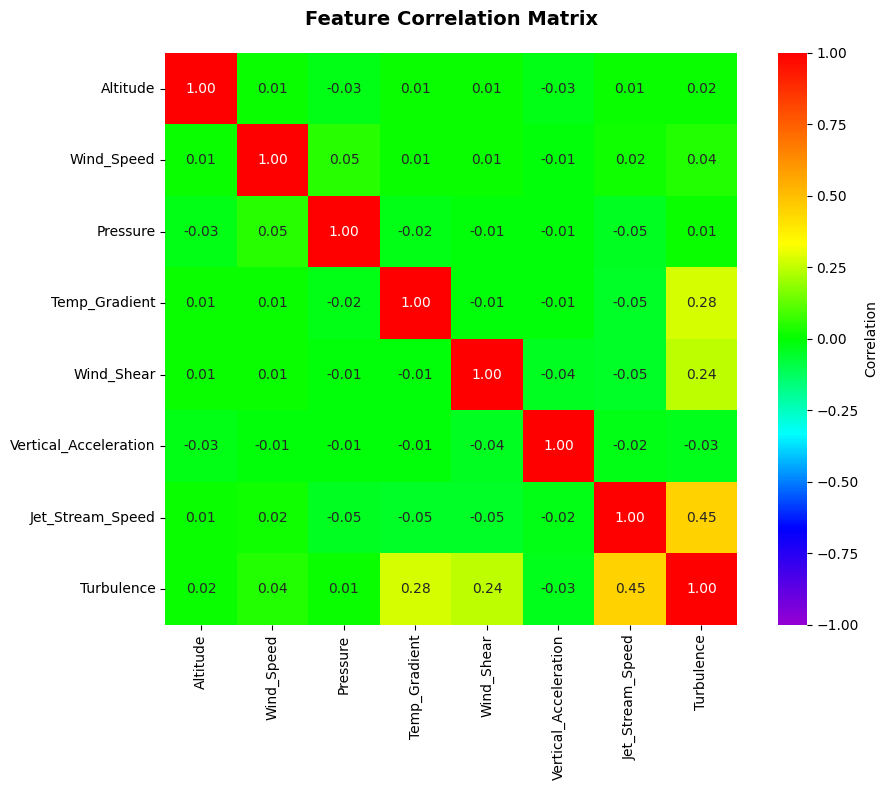


Correlation with Turbulence (sorted):
Turbulence               1.000000
Jet_Stream_Speed         0.449596
Temp_Gradient            0.276455
Wind_Shear               0.243519
Wind_Speed               0.044608
Altitude                 0.015119
Pressure                 0.009637
Vertical_Acceleration   -0.031620
Name: Turbulence, dtype: float64


In [20]:
# Correlation matrix
from matplotlib.colors import LinearSegmentedColormap
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df.corr()
custom_cmap = LinearSegmentedColormap.from_list('rainbow', ['#9400D3', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF7F00', '#FF0000'])
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0, vmin=-1, vmax=1,
            fmt='.2f', square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Turbulence (sorted):")
print(correlation_matrix['Turbulence'].sort_values(ascending=False))


## Key Insights

In [7]:
# Calculate key insights
turb_cases = df[df['Turbulence'] == 1]
non_turb_cases = df[df['Turbulence'] == 0]

print("Key Insights:")
print(f"\nAverage Vertical Acceleration:")
print(f"  - Turbulent cases: {turb_cases['Vertical_Acceleration'].mean():.4f}")
print(f"  - Non-turbulent cases: {non_turb_cases['Vertical_Acceleration'].mean():.4f}")
print(f"  - Difference: {turb_cases['Vertical_Acceleration'].mean() - non_turb_cases['Vertical_Acceleration'].mean():.4f}")

print(f"\nAverage Wind Shear:")
print(f"  - Turbulent cases: {turb_cases['Wind_Shear'].mean():.4f}")
print(f"  - Non-turbulent cases: {non_turb_cases['Wind_Shear'].mean():.4f}")
print(f"  - Difference: {turb_cases['Wind_Shear'].mean() - non_turb_cases['Wind_Shear'].mean():.4f}")

print(f"\nAverage Wind Speed:")
print(f"  - Turbulent cases: {turb_cases['Wind_Speed'].mean():.4f}")
print(f"  - Non-turbulent cases: {non_turb_cases['Wind_Speed'].mean():.4f}")
print(f"  - Difference: {turb_cases['Wind_Speed'].mean() - non_turb_cases['Wind_Speed'].mean():.4f}")

Key Insights:

Average Vertical Acceleration:
  - Turbulent cases: 0.1278
  - Non-turbulent cases: 0.1340
  - Difference: -0.0062

Average Wind Shear:
  - Turbulent cases: 6.6991
  - Non-turbulent cases: 4.5361
  - Difference: 2.1629

Average Wind Speed:
  - Turbulent cases: 104.5498
  - Non-turbulent cases: 100.5238
  - Difference: 4.0260
